# Importando Bibliotecas

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version: %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)

OpenCV Version: 3.4.4 


A função `image_histogram()` abaixo exibe a imagem a a distribuição de pixels ao longo da faixa de cores. É exatamente o mesmo código usado na aula anterior, ele só foi encapsulado em uma função por comodidade.

In [2]:
def image_histogram(image, title=""):
    hist, bins = np.histogram(image.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.figure(figsize=(12,4))

    plt.subplot(121)
    plt.imshow(image, cmap="Greys_r", vmin=0, vmax=255)
    plt.title(title)

    plt.subplot(122)
    plt.hist(image.flatten(),256,[0,256], color='orange', label="Histogram")
    plt.plot(cdf_normalized, color='purple', label="CDF")
    plt.title("Pixel Distribution")
    plt.legend(loc='upper right')
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim([0,256])
    plt.grid()

    plt.show()

A função `multisubplot()` abaixo realiza diversos *plots* de imagens usando `.imshow()` reorganizando os *sobplots* conforme a necessidade.

In [3]:
def multisubplot(images_list, titles_list, grid, cmap="Greys"):
    if len(images_list) != len(titles_list):
        print("Imputs must be on the same size")
    else:
        size = np.array(grid)
        for i in range(len(images_list)):
            plt.subplot(grid[0], grid[1], i+1)
            plt.imshow(images_list[i], cmap=cmap, vmin=0, vmax=255)
            plt.title(titles_list[i])

___

# Equalização

O conceito de equalização já foi abordado na aula anterior, no caso de maiores dúvidas, verifique o arquivo da aula anterior.

A **Equalização** é o processo de redistribuir os pixels ao longo de toda a faixa de cores. 

In [4]:
rintin = cv2.imread("RinTinTin.jpg", cv2.IMREAD_GRAYSCALE)

Abaixo está a imagem original e sua análise de distribuição de pixels (nesse caso, ao longdo da *Gray Scale*):

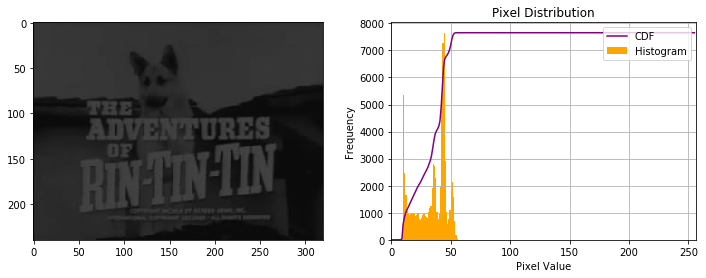

In [5]:
image_histogram(rintin)

A equalização de uma imagem pode ser feita através do método `.equalizeHist()` da `OpenCV`:

In [6]:
rintin_eq = cv2.equalizeHist(rintin)

Verifiquemos o resultado

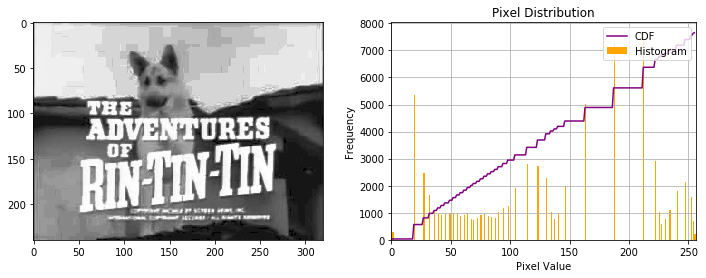

In [7]:
image_histogram(rintin_eq)

___

# Limiarização

A **limiarização** é um processo que converte uma imagem em *Gray Scale* para uma imagem binária (somente preto e branco).

Para isso, é necessário definir um **limiar** (daí provém o nome do precesso). Podemos entender melhor o limiar se observarmos a fórmula abaixo:

$$imagem_{limiarizada}\space=\space \begin{cases}
    branco, \space\space se \space imagem_{original} > limiar\\
    preto, \space\space se \space imagem_{original} \leq limiar
\end{cases}
$$

Portanto, o limiar é o parâmetro que define essa separação binária. Entenda que esse parâmetro pode ser constante ao longo de toda a imagem ou não, dependendo do tipo de limiarização utilizado.

Abaixo serão melhor e descritos e exemplificados diferentes tipos de limiarização disponíveis pela `OpenCV`:

* **Limiarização Simples:**
 
>Trata-se do tipo mais simples de limiarização, que define o limiar como um valor constante para toda a imagem.
> 
>Esse processo é realizado através do método `cv.threshold()`, que recebe os seguintes parâmetros (na ordem mostrada abaixo):
>* `scr`: a imagem a ser limiarizada
>
>* `thresh`: o valor do limiar
>
>* `maxval`: o valor máximo da escala, usado para limitar valores maiores (o funcionamento é parecido com o sistema criado na aula anterior para evitar o "estouro" de pixels)
>
>* `type`: define o tipo de *output* após a limiarização (abaixo será exemplficado todos os tipos)
>
>**Obs.:** esse método gera **dois *outputs***: o primeiro é a imagem original e o segundo é a imagem limiarizada.

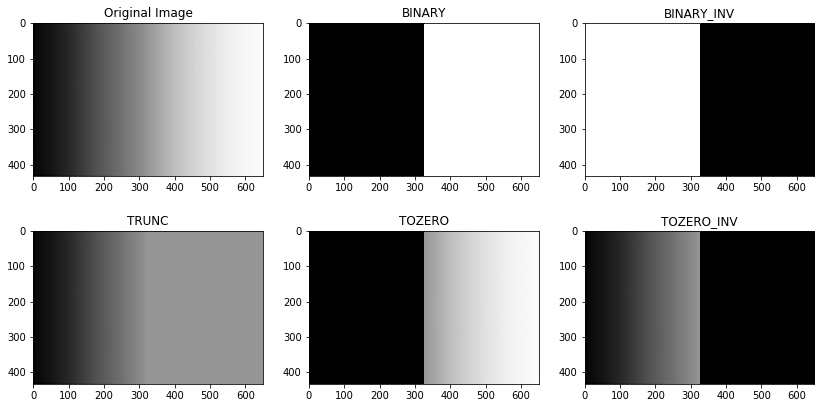

In [8]:
original = cv2.imread("bw.jpg", cv2.IMREAD_GRAYSCALE)
ret, lim_1 = cv2.threshold(original, int(255/2), 255, cv2.THRESH_BINARY)
ret, lim_2 = cv2.threshold(original, int(255/2), 255, cv2.THRESH_BINARY_INV)
ret, lim_3 = cv2.threshold(original, int(255/2), 255, cv2.THRESH_TRUNC)
ret, lim_4 = cv2.threshold(original, int(255/2), 255, cv2.THRESH_TOZERO)
ret, lim_5 = cv2.threshold(original, int(255/2), 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [original, lim_1, lim_2, lim_3, lim_4, lim_5]

plt.figure(figsize=(14,7))
multisubplot(images, titles, [2,3], cmap="Greys_r")
plt.show()

* **Limiarização de Otsu:**
>Quando é feita uma limiarização simples o valor do limiar é escolhido arbitrariamente. O **método de Otsu** (algoritimo criado por Nobuyuki Otsu) evita esse problema, gerando um limiar automaticamente baseando-se na imagem.
>
>Considerando uma imagem bimodal (com somente dois valores distintos) onde o histograma da imagem consiste em somente dois picos. O método de Otsu determina o valor de um limiar que esteja entre esses dois picos.
>
>Para usar esse método basta usar o método de limiarização simples (`cv2.threshold()`) e passar o método de Otsu (`cv2.THRESH_OTSU`) no parâmetro `type`.

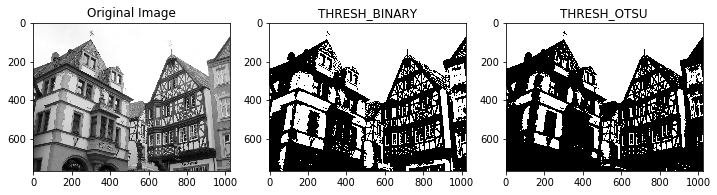

In [9]:
original = cv2.imread("otsu.jpg", cv2.IMREAD_GRAYSCALE)
ret, lim_1 = cv2.threshold(original, int(255/2), 255, cv2.THRESH_BINARY)
ret, lim_2 = cv2.threshold(original,0,255, cv2.THRESH_OTSU)


titles = ['Original Image','THRESH_BINARY','THRESH_OTSU']
images = [original, lim_1, lim_2]

plt.figure(figsize=(12,4))
multisubplot(images, titles, [1,3], cmap="Greys_r")
plt.show()

* **Limiarização Adaptativa:**

>Nesse caso, um algoritimo determina cada pixel baseado em uma pequena região envolta posição do pixel na imagem original (Esse é o conceito de *kernel* que será abordado mais a frente). Com isso, se obtém limiarizações diferentes para diferentes regiões da mesma imagem, gerando resultados melhores para imagens com variações de iluminação, por exemplo.
>
>Esse processo é realizado pelo método `cv2.adaptiveThreshold()`, que recebe os seguintes parâmetros (na ordem mostrada abaixo):
>* `src`: a imagem a ser limiarizada
>
>* `maxValue`: o valor máximo da escala, usado para limitar valores maiores (o funcionamento é parecido com o sistema criado na aula anterior para evitar o "estouro" de pixels)
>
>* `adaptiveMethod`: algoritimo que define como a limiarização é calculada
>
>* `thresholdType`: define o tipo de *output* após a limiarização (abaixo será exemplficado todos os tipos)
>
>* `blockSize`: define a tamanho da região que será usada para calcular o novo pixel (ou seja, define o tamanho do *kernel*)
>
>* `C`: é uma constante que subtraída dos métodos
>
>**Obs.:** Esse método gera **um *output***, ao contrário do método `cv.threshold()` citado anteriormente.

___

# Convolução e Kernel

Mais especificamente em processamento de imagens, **convolução** pode ser resumida na criação de uma nova imagem a partir de outra, de forma que o valor do novo pixel baseia-se na posição onde deste pixel e em uma área de pixels ao redor do pixel na mesma posição na imagem original. Essa área é chamada de **matriz de convolução** (também conhecida como ***kernel***) e se resume em multiplicar por determinados fatores alguns dos pixels dentro dessa área para formar o novo pixel.

A descrição desses dois elementos pode ser difícil de se imaginar, mas a imagem abaixo vai exclarecer tudo:

<img src="kernel.gif" width=500>

A legenda para essa animação é a seguinte:
* **<span style="color:green">Imagem Original</span>**
* **<span style="color:yellow">Kernel</span>**
* **<span style="color:pink">Imagem Resultante</span>**

Entenda que é possível fazer convoluções com quaisquer tamanhos de *kernels*, entretanto o cálculo do novo valor independe do tamanho. Para exemplificar o processo de convolução, os testes serão feitos usando um *kernel* 3 por 3, baseando-se nos elementos da animação.

Abaixo há os valores da imagem original e do *kernel*:

In [10]:
image = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]])

kernel = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1]])

O cálculo feito para gerar o novo valor da imagem é muito simples: multiplicar cada valor do pedaço da imagem original por um dos valorer do *kernel*, considernado a posição desses valores na matriz e somar os resultados obtidos. Podemos representar isso da seguinte forma:

$$kernel\space=\space
\begin{pmatrix}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}\\
    a_{31} & a_{32} & a_{33}\\
\end{pmatrix}\space\space\space\space\space\space pedaço\space=\space \begin{pmatrix}
    b_{11} & b_{12} & b_{13}\\
    b_{21} & b_{22} & b_{23}\\
    b_{31} & b_{32} & b_{33}\\
\end{pmatrix}$$

A multiplicação é feita de forma que os dois valores possuam a mesma posição em suas respectivas matrizes, ou seja:

$$a_{ij}\cdot b_{ij}$$

Por fim o novo valor é a somatória de cada uma dessas multiplicações. Logo:

$$novo \space valor \space=\space \sum_{i,j}^n a_{ij}\cdot b_{ij}$$

A função `new_pixel_value()` definida abaixo faz exatamente o cálculo descrito acima. Note que o valor obtido é exatamente igual ao primeiro valor da matriz rosa da animação, o que confirma que o cálculo está correto.

In [11]:
def new_pixel_value(kernel, image_slice):
    new_value = 0
   
    for row_kernel, row_slice in zip(kernel, image_slice):
        for val_kernel, val_slice in zip(row_kernel, row_slice):
            new_value += val_kernel*val_slice
            
    return new_value

image_slice = image[:3,:3]
print(new_pixel_value(kernel, image_slice))

4


Antes de fazer com que esse cálculo percorra toda a imagem, um detalhe importante deve ser citado: note que, na animação, que a **<span style="color:pink">imagem resultante</span>** é menor do que a **<span style="color:green">imagem original</span>**. Isso ocorre por que o novo valor calculado é sempre adicionado na posição central do ***<span style="color:yellow">kernel</span>*** o que acarreta em um certo "descarte" dos valores das bordas. 

Esse fenômeno é intensificado pelo tamanho do kernel, uma vez que quanto maior o *kernel*, mais distante o centro ficará da borda da imagem original. Essa distância (que pode ser entendida como a quantidade de linhas e colunas "descartadas") pode ser calculada da seguinte forma:

$$d\space=\space \frac{s-1}{2}$$
Onde:
* $s$ é o tamanho do kernel
* $d$ é a distância das bordas

A função `generate_decreaser()` definida abaixo faz esse cálculo:

In [12]:
def generate_decreaser(n):
    return int((n-1)/2)

Além disso, como o resultado é adicionado na posição central do *kernel*, isso requer que o *kernel* não só seja uma matriz quadrada, mas também ímpar, uma vez que matrizes pares não possuem um valor central. Veja o exemplo abaixo:

$$M_{3x3}\space=\space
\begin{pmatrix}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}\\
    a_{31} & a_{32} & a_{33}\\
\end{pmatrix}\space\Rightarrow\space centro\space=\space a_{22}\space\space\space\space$$

$$M_{4x4}\space=\space \begin{pmatrix}
    b_{11} & b_{12} & b_{13} & b_{14}\\
    b_{21} & b_{22} & b_{23} & b_{24}\\
    b_{31} & b_{32} & b_{33} & b_{34}\\
    b_{41} & b_{42} & b_{43} & b_{44}\\
\end{pmatrix}\space\Rightarrow\space centro\space=\space ?$$


A função `valid_kernel()` definida abaixo verifica se uma matriz é quadrada e ímpar:

In [13]:
def valid_kernel(matrix, valid=True):
    if matrix.shape[0] != matrix.shape[1]:
        valid = False
        print("Kernel must be a square matrix")
    elif matrix.shape[0]%2 == 0 or matrix.shape[1]%2 == 0:
        valid = False
        print("Kernel size must be even in order to have a center")
    else:
        return valid, matrix.shape[0]

Por fim, o pedaço da imagem que é usado para realizar o cálculo do novo valor está entre a posição do centro menos $d$ e a posição do centro mais $d$. A matriz abaixo exemplifica esse conceito, generalizando para qualquer posição do centro ($(i,j)$) e para qualquer distância $d$ das bordas:

$$\begin{pmatrix}
    a_{(i-d)(j-d)} & \dots & a_{i(j-d)} & \dots & a_{(i+d)(j-d)}\\
    \vdots & & \vdots & & \vdots\\
    a_{(i-d)j}& \dots & a_{ij} & \dots & a_{(i+d)j}\\
    \vdots & & \vdots & & \vdots \\
    a_{(i-d)(j+d)} & \dots & a_{i(j+d)} &\dots & a_{(i+d)(j+d)} \\
\end{pmatrix}$$

A função `image_slicer()` definida abaixo seleciona um pedaço da imagem com relação aos elementos citados acima:

In [14]:
def image_slicer(image, i, j, d):
    return image[i-d:i+d+1,j-d:j+d+1]

Por fim, a última parte é fazer com que o centro do *kernel* percorra toda os valores da matriz dentro do intervalo $[d:n-d]$ (ou seja, com exceção das bordas), sendo calculado o novo valor para cada posição do *kernel* e armazenando cada um desses valores até o *kernel* percorrer tudo.

A função `convolution()` faz o processo de convolução inteiro, usando todas as outras funções anteriormente citadas:

In [15]:
def convolution(image, kernel):
    status, n = valid_kernel(kernel)
    if status == False:
        pass
    else:    
        result_list = []
        d = generate_decreaser(n)
        for i in range(d, image.shape[0]-d):
            row_list = []
            for j in range(d, image.shape[1]-d):
                image_slice = image_slicer(image, i, j, d)
                new_value = new_pixel_value(kernel, image_slice)
                row_list.append(new_value)
            result_list.append(row_list)
        return np.array(result_list)

Por fim, note que o resultado obtido é exatamente o mesmo da **<span style="color:pink">Imagem Resultante</span>**:

In [16]:
convolution(image, kernel)

array([[4, 3, 4],
       [2, 4, 3],
       [2, 3, 4]])

O processo de **convolução** permite que sejam gerados "efeitos" (chamados de núcleos) interessantes e muito úteis dependendo dos fatores que são inseridos no *kernel*. A elaboração desses núcleos é baseada em conhecimentos matemáticos e/ou ciência da computação de alto nível. Entretanto existem efeitos prontos e alguns muito conhecidos. Veja alguns exemplos:

**Obs.:** Todos os exemplos demonstrados abaixo foram baseados no conteúdo disponível em: http://setosa.io/ev/image-kernels/

In [17]:
conv_image = cv2.cvtColor(cv2.imread("library-ny.jpg"), cv2.COLOR_BGR2GRAY)

* **Realçar de Bordas (*Outline* ou *Edge*):**

É usado para realçar grandes diferenças entre valores de *pixels*.

$$kernel\space=\space
\begin{pmatrix}
-1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1 
\end{pmatrix}
$$

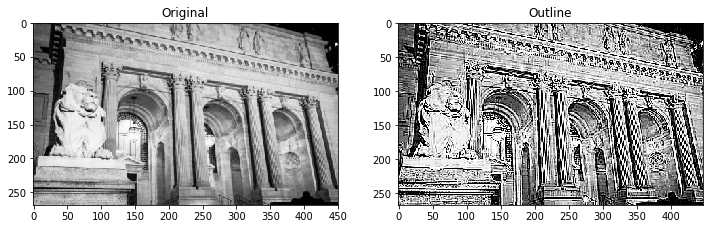

In [18]:
kernel_1 = np.array([[-1, -1, -1],
                     [-1,  9, -1],
                     [-1, -1, -1]])

result_1 = convolution(conv_image, kernel_1)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.imshow(conv_image, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(result_1, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Outline")

plt.show()

* **Aguçar (*Sharpen*):**

Faz com que a imagem apareça mais vívida enfatizando diferenças entre os valores de *pixels* vizinhos.

$$kernel\space=\space
\begin{pmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 
\end{pmatrix}
$$

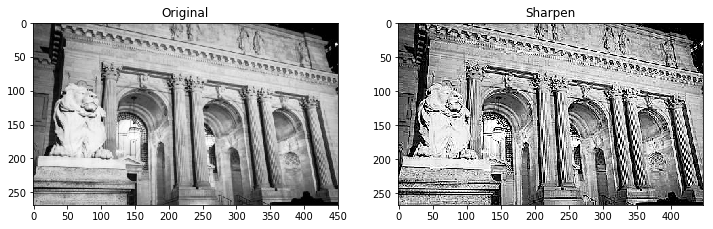

In [19]:
kernel_2 = np.array([[ 0, -1,  0],
                     [-1,  5, -1],
                     [ 0, -1,  0]])

result_2 = convolution(conv_image, kernel_2)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.imshow(conv_image, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(result_2, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Sharpen")

plt.show()

* **Desfocar (*Blur*):**

$$kernel\space=\space
\begin{pmatrix}
0.0625 & 0.125 & 0.0625 \\
 0.125 &  0.25 &  0.125 \\
0.0625 & 0.125 & 0.0625 
\end{pmatrix}
$$

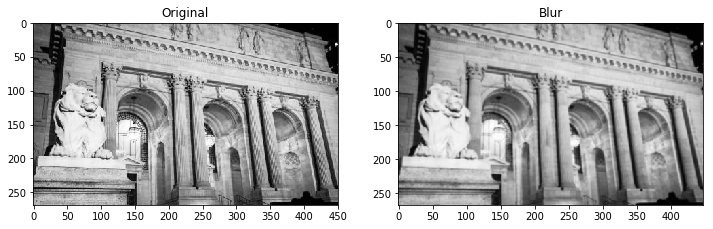

In [20]:
kernel_4 = np.array([[ 0.0625,  0.125,  0.0625],
                     [  0.125,   0.25,   0.125],
                     [ 0.0625,  0.125,  0.0625]])

result_4 = convolution(conv_image, kernel_4)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.imshow(conv_image, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(result_4, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Blur")

plt.show()

* **Destacar Relevo (*Emboss*):**

Dá a ilusão de profundidade enfatizando a diferença entre *pixels* vizinhos em uma certa direção. A direção da matriz depende da posição dos valores positivos e negativos (pense em uma seta que vai dosvalores negativos até os positivos).

$$kernel\space=\space
\begin{pmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 
\end{pmatrix}\space =\space \big(\searrow\big)$$

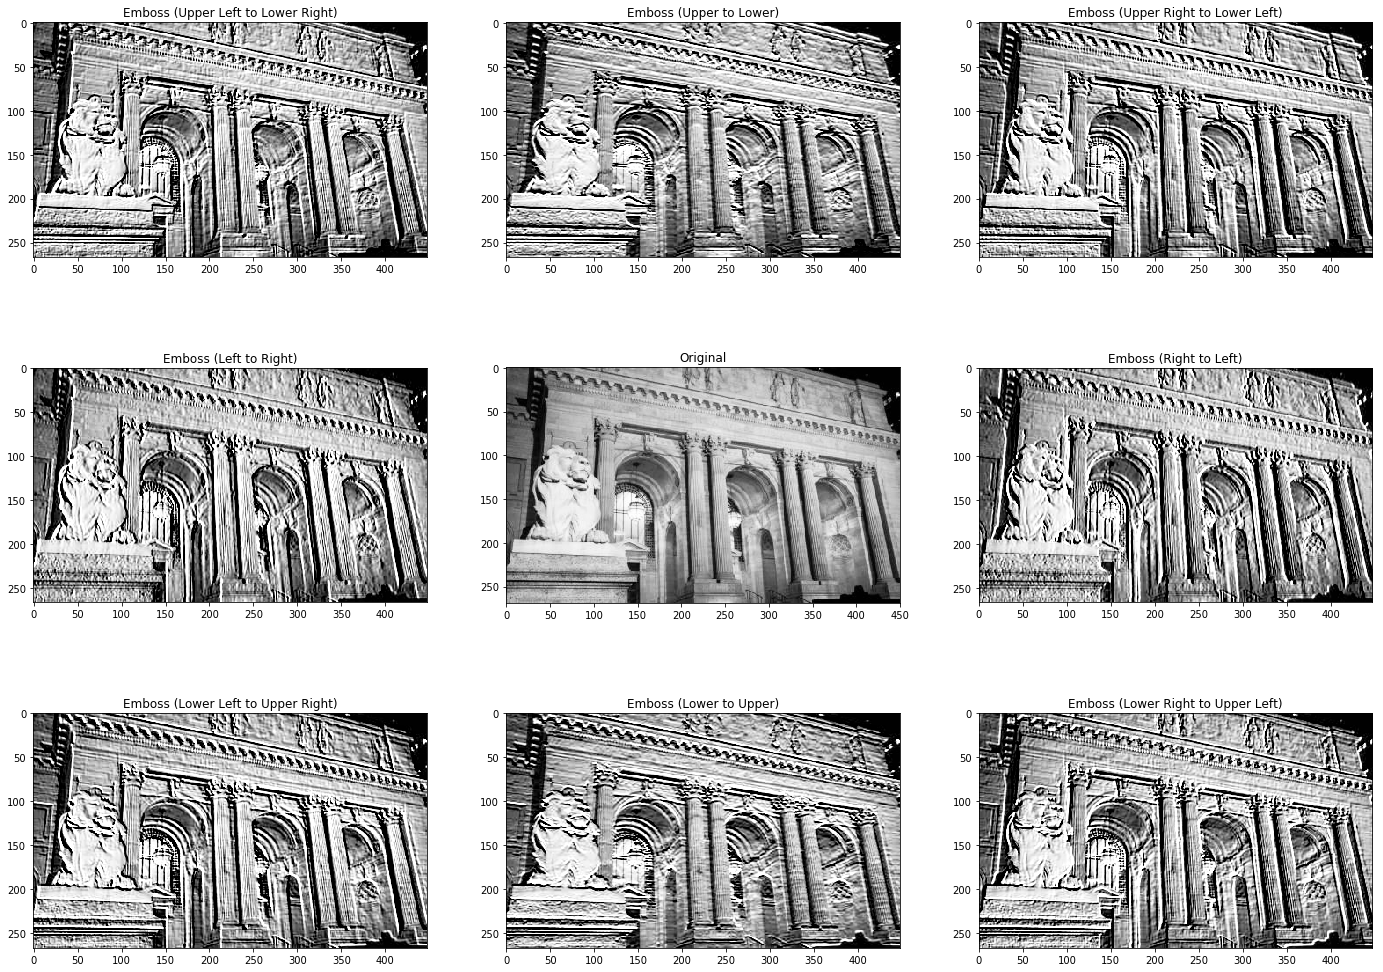

In [21]:
kernel_3_ul2lr = np.array([[-2, -1,  0],
                           [-1,  1,  1],
                           [ 0,  1,  2]])

kernel_3_lr2ul = np.array([[ 2,  1,  0],
                           [ 1,  1, -1],
                           [ 0, -1, -2]])

kernel_3_ll2ur = np.array([[ 0,  1,  2],
                           [-1,  1,  1],
                           [-2, -1,  0]])

kernel_3_ur2ll = np.array([[ 0, -1, -2],
                           [ 1,  1, -1],
                           [ 2,  1,  0]])


kernel_3_r2l = np.array([[ 1, 0, -1],
                         [ 2, 1, -2],
                         [ 1, 0, -1]])

kernel_3_l2r = np.array([[ -1, 0, 1],
                         [ -2, 1, 2],
                         [ -1, 0, 1]])

kernel_3_l2u = np.array([[ 1, 2, 1],
                         [ 0, 1, 0],
                         [-1,-2,-1]])

kernel_3_u2l = np.array([[-1,-2,-1],
                         [ 0, 1, 0],
                         [ 1, 2, 1]])

result_3_ul2lr = convolution(conv_image, kernel_3_ul2lr)
result_3_ll2ur = convolution(conv_image, kernel_3_ll2ur)
result_3_lr2ul = convolution(conv_image, kernel_3_lr2ul)
result_3_ur2ll = convolution(conv_image, kernel_3_ur2ll)

result_3_r2l = convolution(conv_image, kernel_3_r2l)
result_3_l2r = convolution(conv_image, kernel_3_l2r)
result_3_l2u = convolution(conv_image, kernel_3_l2u)
result_3_u2l = convolution(conv_image, kernel_3_u2l)

images_list = [result_3_ul2lr, result_3_u2l, result_3_ur2ll,
               result_3_l2r, conv_image, result_3_r2l,
               result_3_ll2ur, result_3_l2u, result_3_lr2ul]

titles_list = ["Emboss (Upper Left to Lower Right)",
               "Emboss (Upper to Lower)",
               "Emboss (Upper Right to Lower Left)",
               "Emboss (Left to Right)",
               "Original",
               "Emboss (Right to Left)",
               "Emboss (Lower Left to Upper Right)",
               "Emboss (Lower to Upper)",
               "Emboss (Lower Right to Upper Left)"]

plt.figure(figsize=(24,18))
multisubplot(images_list, titles_list, [3,3], cmap="Greys_r")

* **Filtros de Sobel (*Sobel Filters*):**
Usado para mostrar **somente** as diferenças entre *pixels* vizinhos em uma determinada direção. Note que a similaridade com as matrizes do *Emboss*: apenas o valor central ($a_{22}$) é diferente.

$$
\begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 
\end{pmatrix}
$$

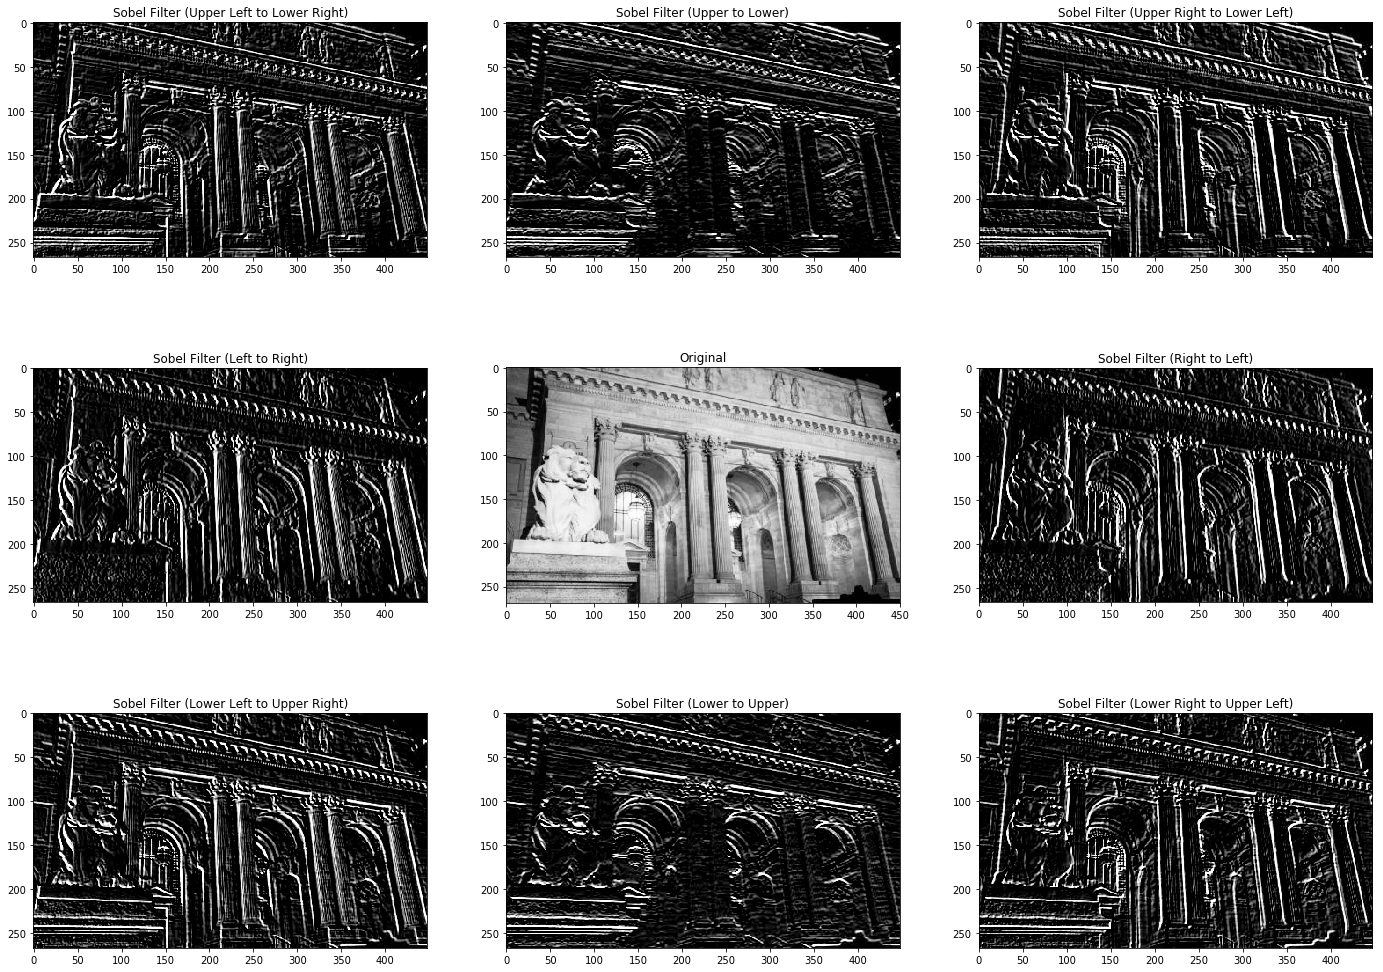

In [22]:
kernel_3_ul2lr = np.array([[-2, -1,  0],
                           [-1,  0,  1],
                           [ 0,  1,  2]])

kernel_3_lr2ul = np.array([[ 2,  1,  0],
                           [ 1,  0, -1],
                           [ 0, -1, -2]])

kernel_3_ll2ur = np.array([[ 0,  1,  2],
                           [-1,  0,  1],
                           [-2, -1,  0]])

kernel_3_ur2ll = np.array([[ 0, -1, -2],
                           [ 1,  0, -1],
                           [ 2,  1,  0]])


kernel_3_r2l = np.array([[ 1, 0, -1],
                         [ 2, 0, -2],
                         [ 1, 0, -1]])

kernel_3_l2r = np.array([[ -1, 0, 1],
                         [ -2, 0, 2],
                         [ -1, 0, 1]])

kernel_3_l2u = np.array([[ 1, 2, 1],
                         [ 0, 0, 0],
                         [-1,-2,-1]])

kernel_3_u2l = np.array([[-1,-2,-1],
                         [ 0, 0, 0],
                         [ 1, 2, 1]])

result_3_ul2lr = convolution(conv_image, kernel_3_ul2lr)
result_3_ll2ur = convolution(conv_image, kernel_3_ll2ur)
result_3_lr2ul = convolution(conv_image, kernel_3_lr2ul)
result_3_ur2ll = convolution(conv_image, kernel_3_ur2ll)

result_3_r2l = convolution(conv_image, kernel_3_r2l)
result_3_l2r = convolution(conv_image, kernel_3_l2r)
result_3_l2u = convolution(conv_image, kernel_3_l2u)
result_3_u2l = convolution(conv_image, kernel_3_u2l)

images_list = [result_3_ul2lr, result_3_u2l, result_3_ur2ll,
               result_3_l2r, conv_image, result_3_r2l,
               result_3_ll2ur, result_3_l2u, result_3_lr2ul]

titles_list = ["Sobel Filter (Upper Left to Lower Right)",
               "Sobel Filter (Upper to Lower)",
               "Sobel Filter (Upper Right to Lower Left)",
               "Sobel Filter (Left to Right)",
               "Original",
               "Sobel Filter (Right to Left)",
               "Sobel Filter (Lower Left to Upper Right)",
               "Sobel Filter (Lower to Upper)",
               "Sobel Filter (Lower Right to Upper Left)"]

plt.figure(figsize=(24,18))
multisubplot(images_list, titles_list, [3,3], cmap="Greys_r")

___

# Dinamicidade Usando `OpenCV`

Embora foi demonstrado como as convoluções são feitas, não é necessário fazer todo a elaboração manualmente. Dentro da biblioteca `OpenCV` existem métodos próprios para isso. Usando também comandos para manipular alguns elementos do `Jupyter Notebook` é possível criar dinamicidade e interatividade, não somente análises estáticas.

**Obs.:** Não se preocupe com os códigos utilizados para manipular elementos do `Jupyter Notebook`, foque nos resultados gerados.

Importando imagem de referência:

In [23]:
img = cv2.imread("hall_box_battery1.jpg",cv2.IMREAD_GRAYSCALE)
small = cv2.resize(img, (768, 384), 0,0)

* **Intensidade de Desfoque:**

In [25]:
blur = small   
def plot_blur(sz):
    global blur
    plt.rcParams["figure.figsize"] = (10,5)
    blur = cv2.blur(small, (sz,sz))
    plt.imshow(blur, cmap="Greys_r")
dinamic_blur = interact(plot_blur, sz=IntSlider(min=1, max=15, step=1, value=3))    

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0zLCBkZXNjcmlwdGlvbj11J3N6JywgbWF4PTE1LCBtaW49MSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC3igKY=


* ***Kernel* Manual:**

In [26]:
out3 = small
def plot_filter(widgets, data):
    kernel = aux.make_np_from_widgets_list(widgets)
    global out3
    out3 = cv2.filter2D(data, -1,  kernel)
    plt.imshow(out3, cmap="Greys_r")

In [27]:
list_kernel, widgets_kernel = aux.make_widgets_mat(3,3)

In [28]:
widgets_kernel

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oSW50VGV4dCh2YWx1ZT0wKSwgSW50VGV4dCh2YWx1ZT0wKSwgSW50VGV4dCh2YWx1ZT0wKSkpLCBIQm94KGNoaWxkcmVuPShJbnRUZXh0KHbigKY=


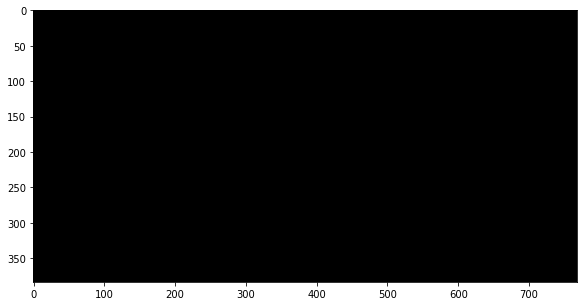

In [29]:
plot_filter(list_kernel, blur)

* **Linhas de *Canny*:**

In [30]:
canny_img = None

def canny(minimo, maximo):
    img = cv2.Canny(small, minimo, maximo)
    plt.imshow(img, cmap="Greys_r")
    global canny_img
    canny_img = img

In [31]:
w = interactive(canny, minimo=10, maximo=40)

In [32]:
w

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSdtaW5pbW8nLCBtYXg9MzAsIG1pbj0tMTApLCBJbnRTbGlkZXIodmFsdWU9NDAsIGRlc2NyaXDigKY=


___

# Métodos de Identificação de Elementos

* **Detector de Bordas de *Canny* (*Canny Edge Detector*):**

O detector de bordas (ou linhas) de *Canny* combina algumas operações lineares de forma mais sofisticada, portanto seu funcionamento não será aprifundado

In [35]:
min_contrast = 100
max_contrast = 200
linhas = cv2.Canny(small, min_contrast, max_contrast)

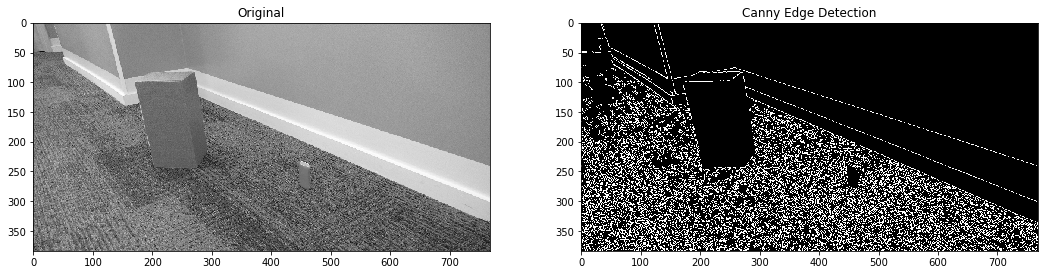

In [40]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.imshow(small, cmap="Greys_r")
plt.title("Original")

plt.subplot(122)
plt.imshow(linhas, cmap="Greys_r")
plt.title("Canny Edge Detection")

plt.show()

* **Detector de cores com `inRange`:**

In [41]:
img_color = cv2.imread("hall_box_battery1.jpg")
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

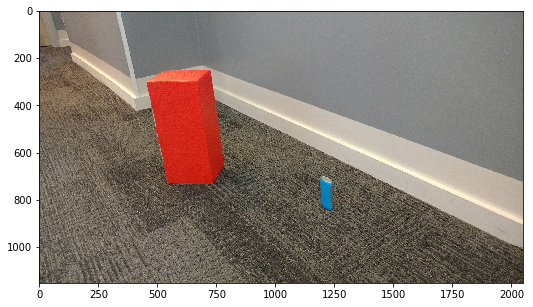

In [42]:
plt.imshow(img_rgb)

In [43]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#ff0e00',
    disabled=False
)

In [44]:
colorpicker

ColorPicker(value='#ff0e00', description=u'Escolha uma cor')

In [45]:
hsv1, hsv2 = aux.ranges(colorpicker.value)

In [46]:
hsv1

array([ 0, 50, 50], dtype=uint8)

In [47]:
hsv2

array([ 10, 255, 255], dtype=uint8)

In [48]:
mask = cv2.inRange(img_hsv, hsv1, hsv2)    

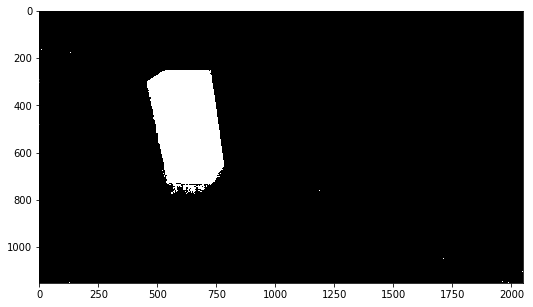

In [49]:
plt.imshow(mask, cmap="Greys_r")

In [50]:
selecao = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

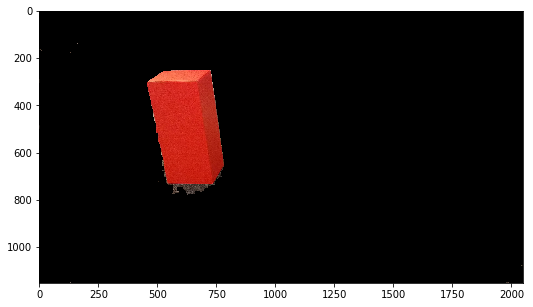

In [51]:
# Fechamos todos os buracos menores que um quadrado 10x10
segmentado_cor = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,np.ones((10, 10)))
selecao = cv2.bitwise_and(img_rgb, img_rgb, mask=segmentado_cor)
plt.imshow(selecao)


# Operações morphológicas

Veja em [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) e nos slides

## Componentes conexos e contornos

E se tivéssemos mais de um objeto vermelho na imagem? Como faríamos para identificá-los?

Fonte das imagens: [http://time.com/4299724/coca-cola-diet-coke-redesign/](http://time.com/4299724/coca-cola-diet-coke-redesign/)

In [ ]:
coke = cv2.imread("coke-cans.jpg")
coke_rgb= cv2.cvtColor(coke, cv2.COLOR_BGR2RGB)
coke_hsv= cv2.cvtColor(coke, cv2.COLOR_BGR2HSV)

In [ ]:
plt.imshow(coke_rgb)

In [ ]:
cor_menor = np.array([172, 50, 50])
cor_maior = np.array([180, 255, 255])
mask_coke = cv2.inRange(coke_hsv, cor_menor, cor_maior)


In [ ]:

segmentado_coke = cv2.morphologyEx(mask_coke,cv2.MORPH_CLOSE,np.ones((4, 4)))


In [ ]:
plt.imshow(segmentado_coke)


Contorno - juntando componentes conexos

In [ ]:
img_out, contornos, arvore = cv2.findContours(segmentado_coke.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 


In [ ]:
plt.imshow(img_out)

In [ ]:
contornos_img = coke_rgb.copy()
cv2.drawContours(contornos_img, contornos, -1, [0, 0, 255], 3);
    

In [ ]:
len(contornos)

In [ ]:
plt.imshow(contornos_img)

In [ ]:
maior = None
maior_area = 0
for c in contornos:
    area = cv2.contourArea(c)
    if area > maior_area:
        maior_area = area
        maior = c



In [ ]:
cv2.drawContours(contornos_img, [maior], -1, [0, 255, 255], 5);


In [ ]:
plt.imshow(contornos_img)

# Transformada de Hough

A [transformada de Hough](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html) encontra todas as possíveis linhas que estão presentes na imagem

In [ ]:
hough_img = canny_img.copy() # Vamos reusar a imagem de canny


lines = cv2.HoughLinesP(hough_img, 10, math.pi/180.0, 100, np.array([]), 45, 5)

a,b,c = lines.shape

hough_img_rgb = cv2.cvtColor(hough_img, cv2.COLOR_GRAY2BGR)

for i in range(a):
    # Faz uma linha ligando o ponto inicial ao ponto final, com a cor vermelha (BGR)
    cv2.line(hough_img_rgb, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 5, cv2.LINE_AA)

In [ ]:
plt.imshow(linhas)

In [ ]:
plt.imshow(hough_img_rgb)

# Hough Circles

Funciona de forma equivalente, mas acha círculos. Veja o demo `draw_circles_video.py`
